In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
 
df = pd.read_csv("train_storming_round.csv")

df.head(5)

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   455ca878         45         2/1/2021                9/1/2023   
1       2   c823ce77         48         4/1/2022                2/1/2024   
2       3   62154055         53         5/1/2020                9/1/2023   
3       4   c58bfa6e         44         7/1/2019                3/1/2022   
4       5   b1e5f770         20         9/1/2020                2/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   1/1/2023                             3                              6   
1   1/1/2023                             1                              4   
2   1/1/2023                             3                              5   
3   1/1/2023                             1                              0   
4   1/1/2023                             0                              6   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                              2               12  ...                  9   
1                             12               21  ...                 14   
2                              5               17  ...                 14   
3                             12               17  ...                 11   
4                             10               17  ...                 13   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              8                15                 0   
1                             10                17                25   
2                             11                21                26   
3                              9                13                18   
4                              6                19                20   

   ANBP_value  net_income  number_of_policy_holders  \
0           0       93313                        30   
1     1071450      164804                         0   
2     1601210      426690                        84   
3      283230       47793                        39   
4     1957680      562239                        19   

   number_of_cash_payment_policies  
0                              162  
1                              175  
2                               78  
3                              144  
4                               40  

[5 rows x 23 columns]

In [2]:
df.tail(5)

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
15303   15304   d3b44e44         43         4/1/2019               10/1/2023   
15304   15305   0b1d7054         28         9/1/2022                3/1/2024   
15305   15306   51321fa2         45         1/1/2021                4/1/2024   
15306   15307   dd4a0d2d         25        12/1/2021               12/1/2023   
15307   15308   393f3bf6         53         1/1/2023                2/1/2024   

      year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
15303   8/1/2024                             1                              6   
15304   8/1/2024                             1                              5   
15305   8/1/2024                             0                              6   
15306   8/1/2024                             0                              4   
15307   8/1/2024                             1                              4   

       unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
15303                              6               17  ...                 10   
15304                              3               13  ...                 14   
15305                             17               26  ...                 22   
15306                              6               14  ...                 13   
15307                              7               16  ...                  9   

       unique_customers_last_7_days  unique_customers_last_15_days  \
15303                             3                              4   
15304                             4                              3   
15305                             6                              7   
15306                             6                              3   
15307                             3                              8   

       unique_customers_last_21_days  unique_customers  new_policy_count  \
15303                             11                18                25   
15304                             11                18                15   
15305                              6                19                30   
15306                              6                15                 0   
15307                              1                12                19   

       ANBP_value  net_income  number_of_policy_holders  \
15303     2473900      404980                        18   
15304      922050      198187                        18   
15305      645330      133263                        57   
15306           0       32546                        30   
15307     1726568      295565                        36   

       number_of_cash_payment_policies  
15303                              100  
15304                              120  
15305                              270  
15306                              171  
15307                                0  

[5 rows x 23 columns]

### **Part 1 - Key metrics and distributions**

In [3]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

**Droping irrelevant columns**

In [4]:
df.drop(['row_id','agent_code'],axis=1,inplace=True)
df.head(5)

agent_age agent_join_month first_policy_sold_month year_month  \
0         45         2/1/2021                9/1/2023   1/1/2023   
1         48         4/1/2022                2/1/2024   1/1/2023   
2         53         5/1/2020                9/1/2023   1/1/2023   
3         44         7/1/2019                3/1/2022   1/1/2023   
4         20         9/1/2020                2/1/2023   1/1/2023   

   unique_proposals_last_7_days  unique_proposals_last_15_days  \
0                             3                              6   
1                             1                              4   
2                             3                              5   
3                             1                              0   
4                             0                              6   

   unique_proposals_last_21_days  unique_proposal  \
0                              2               12   
1                             12               21   
2                              5               17   
3                             12               17   
4                             10               17   

   unique_quotations_last_7_days  unique_quotations_last_15_days  ...  \
0                              3                               0  ...   
1                              3                               1  ...   
2                              1                               6  ...   
3                              1                               1  ...   
4                              3                               6  ...   

   unique_quotations  unique_customers_last_7_days  \
0                  9                             3   
1                 14                             4   
2                 14                             3   
3                 11                             2   
4                 13                             3   

   unique_customers_last_15_days  unique_customers_last_21_days  \
0                              4                              8   
1                              3                             10   
2                              7                             11   
3                              2                              9   
4                             10                              6   

   unique_customers  new_policy_count  ANBP_value  net_income  \
0                15                 0           0       93313   
1                17                25     1071450      164804   
2                21                26     1601210      426690   
3                13                18      283230       47793   
4                19                20     1957680      562239   

   number_of_policy_holders  number_of_cash_payment_policies  
0                        30                              162  
1                         0                              175  
2                        84                               78  
3                        39                              144  
4                        19                               40  

[5 rows x 21 columns]

In [5]:
df.count()

agent_age                          15308
agent_join_month                   15308
first_policy_sold_month            15308
year_month                         15308
unique_proposals_last_7_days       15308
unique_proposals_last_15_days      15308
unique_proposals_last_21_days      15308
unique_proposal                    15308
unique_quotations_last_7_days      15308
unique_quotations_last_15_days     15308
unique_quotations_last_21_days     15308
unique_quotations                  15308
unique_customers_last_7_days       15308
unique_customers_last_15_days      15308
unique_customers_last_21_days      15308
unique_customers                   15308
new_policy_count                   15308
ANBP_value                         15308
net_income                         15308
number_of_policy_holders           15308
number_of_cash_payment_policies    15308
dtype: int64

**----Calculating the mean,standard deviation,minimum and the interquartile values for each numeric column----**

In [6]:
summary = df.describe().T 
summary['range'] = summary['max'] - summary['min']
summary['iqr'] = summary['75%'] - summary['25%']
summary_formatted = summary.round(2)  
summary_formatted

count        mean        std     min  \
agent_age                        15308.0       40.59      11.69    20.0   
unique_proposals_last_7_days     15308.0        1.49       1.12     0.0   
unique_proposals_last_15_days    15308.0        2.99       2.00     0.0   
unique_proposals_last_21_days    15308.0       10.05       6.04     0.0   
unique_proposal                  15308.0       17.52       6.62     1.0   
unique_quotations_last_7_days    15308.0        1.99       1.42     0.0   
unique_quotations_last_15_days   15308.0        3.00       2.00     0.0   
unique_quotations_last_21_days   15308.0        4.47       2.88     0.0   
unique_quotations                15308.0       13.92       4.66     1.0   
unique_customers_last_7_days     15308.0        3.00       1.64     0.0   
unique_customers_last_15_days    15308.0        5.00       2.44     0.0   
unique_customers_last_21_days    15308.0        7.50       3.47     0.0   
unique_customers                 15308.0       15.49       4.54     1.0   
new_policy_count                 15308.0       20.27       9.54     0.0   
ANBP_value                       15308.0  1025337.79  805498.86     0.0   
net_income                       15308.0   228041.39  173667.10  1160.0   
number_of_policy_holders         15308.0       30.97      24.62     0.0   
number_of_cash_payment_policies  15308.0      101.18      75.32     0.0   

                                       25%       50%         75%        max  \
agent_age                            31.00      41.0       51.00       60.0   
unique_proposals_last_7_days          0.00       1.0        2.00        3.0   
unique_proposals_last_15_days         1.00       3.0        5.00        6.0   
unique_proposals_last_21_days         5.00      10.0       15.00       20.0   
unique_proposal                      12.00      17.0       23.00       34.0   
unique_quotations_last_7_days         1.00       2.0        3.00        4.0   
unique_quotations_last_15_days        1.00       3.0        5.00        6.0   
unique_quotations_last_21_days        2.00       4.0        7.00        9.0   
unique_quotations                    11.00      14.0       17.00       32.0   
unique_customers_last_7_days          2.00       3.0        4.00        6.0   
unique_customers_last_15_days         3.00       5.0        7.00       10.0   
unique_customers_last_21_days         5.00       8.0       10.00       15.0   
unique_customers                     12.00      15.0       19.00       31.0   
new_policy_count                     15.00      21.0       27.00       42.0   
ANBP_value                       347323.75  903144.5  1560699.50  3933840.0   
net_income                        92825.00  189974.0   321744.75  1140237.0   
number_of_policy_holders             12.00      28.0       48.00      116.0   
number_of_cash_payment_policies      38.00      90.0      152.00      378.0   

                                     range         iqr  
agent_age                             40.0       20.00  
unique_proposals_last_7_days           3.0        2.00  
unique_proposals_last_15_days          6.0        4.00  
unique_proposals_last_21_days         20.0       10.00  
unique_proposal                       33.0       11.00  
unique_quotations_last_7_days          4.0        2.00  
unique_quotations_last_15_days         6.0        4.00  
unique_quotations_last_21_days         9.0        5.00  
unique_quotations                     31.0        6.00  
unique_customers_last_7_days           6.0        2.00  
unique_customers_last_15_days         10.0        4.00  
unique_customers_last_21_days         15.0        5.00  
unique_customers                      30.0        7.00  
new_policy_count                      42.0       12.00  
ANBP_value                       3933840.0  1213375.75  
net_income                       1139077.0   228919.75  
number_of_policy_holders             116.0       36.00  
number_of_cash_payment_policies      378.0      114.00

#### **---Identifying outliers---**
-----Here we use box plots to find outliers in the dataset for each numerical column

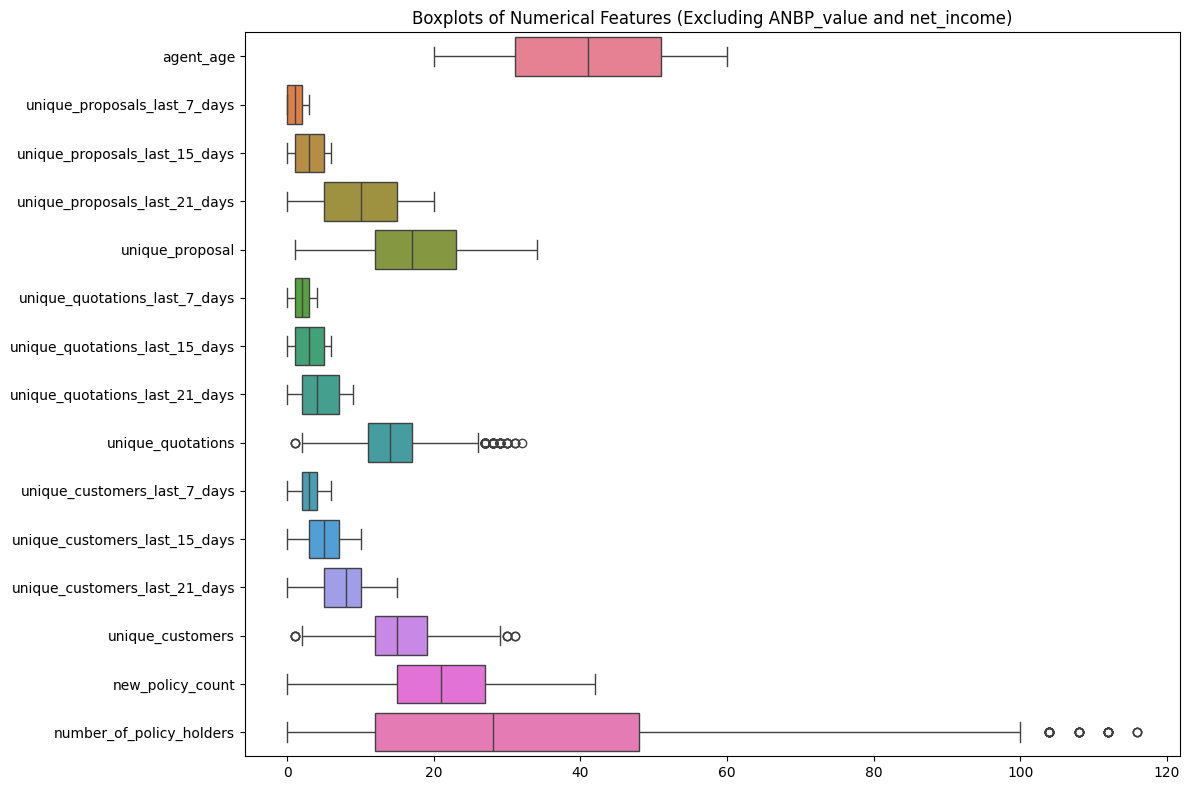

In [7]:
# Exclude 'ANBP_value' and 'net_income' columns from the DataFrame
df_filtered = df.drop(columns=['ANBP_value', 'net_income','number_of_cash_payment_policies'])

# Plotting boxplots for all other numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered.select_dtypes(include='number'), orient='h')
plt.title('Boxplots of Numerical Features (Excluding ANBP_value and net_income)')
plt.tight_layout()
plt.show()

<Axes: xlabel='ANBP_value'>

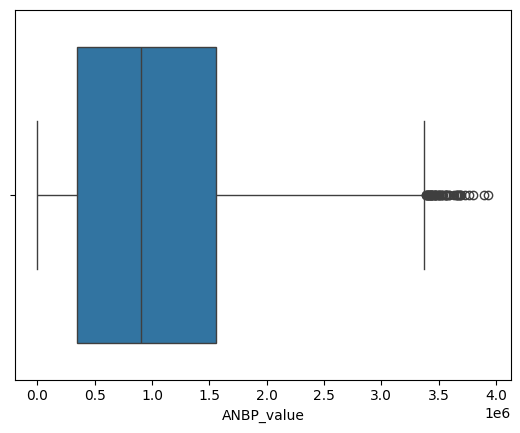

In [8]:
sns.boxplot(x=df['ANBP_value'])

<Axes: xlabel='net_income'>

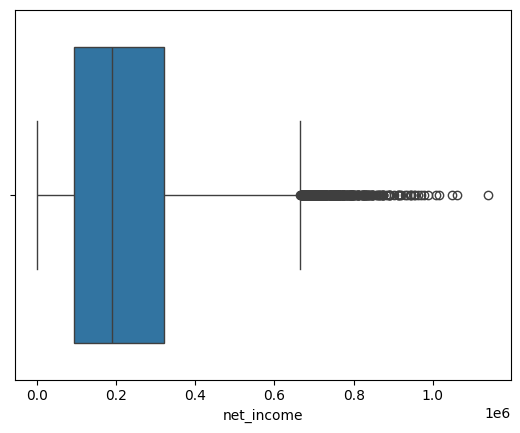

In [9]:
sns.boxplot(x=df['net_income'])

##### **----Deriving the target column using new_policy_count**

In [10]:
df['target'] = (df['new_policy_count'] > 0).astype(int)

**Plotting a graph to find the distributions of 1s and 0s in the target column**

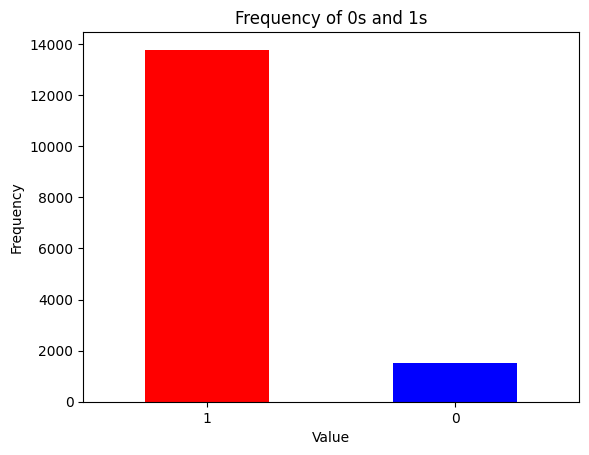

In [11]:
df['target'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Frequency of 0s and 1s')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

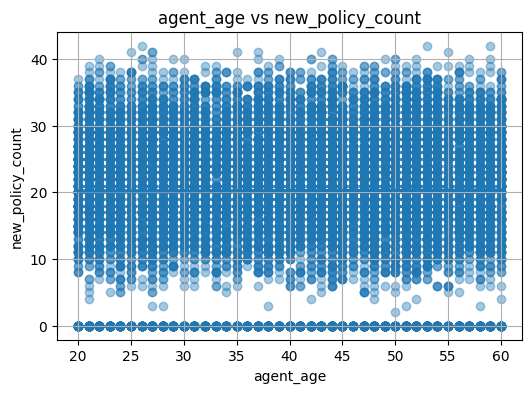

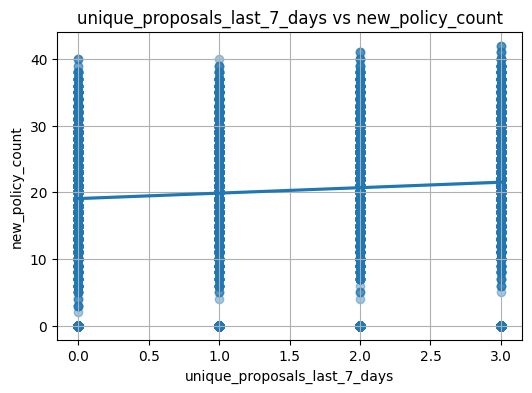

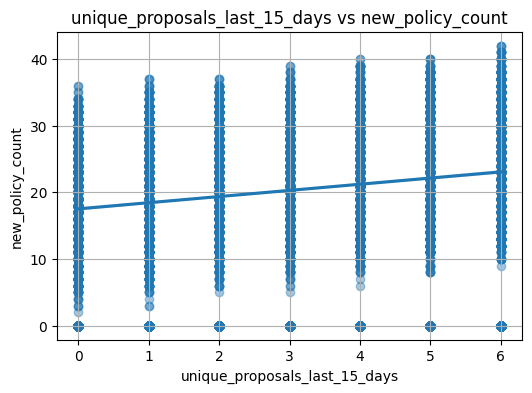

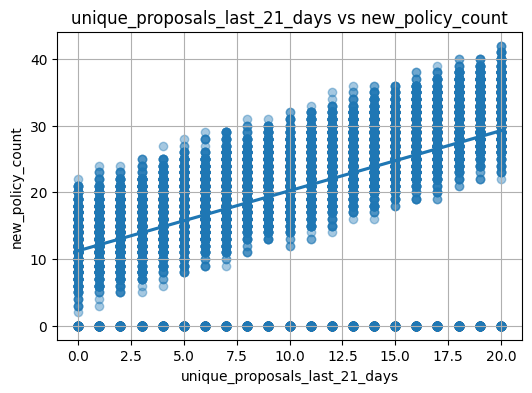

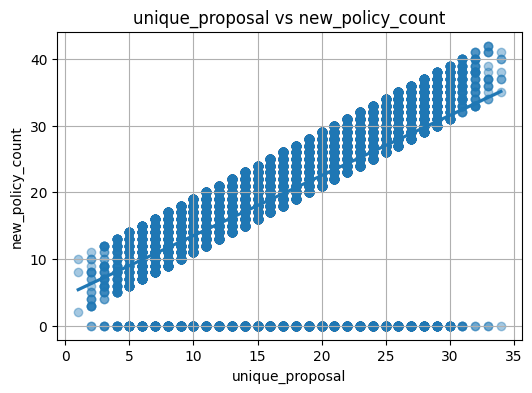

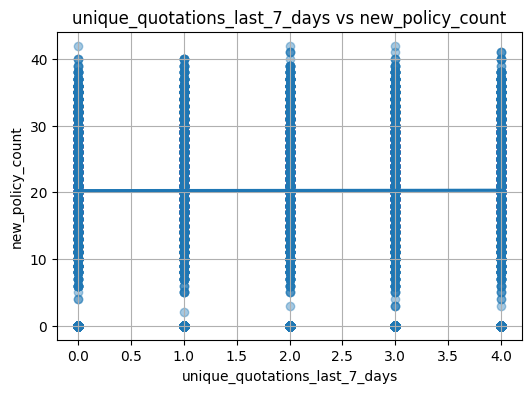

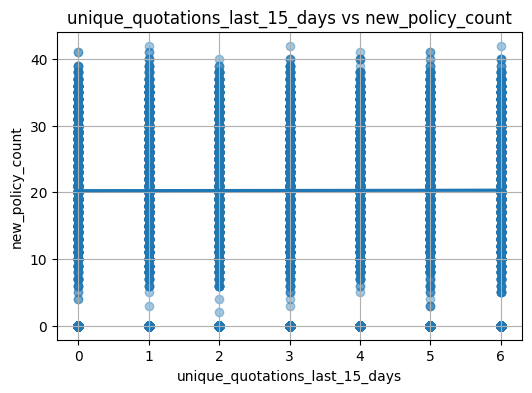

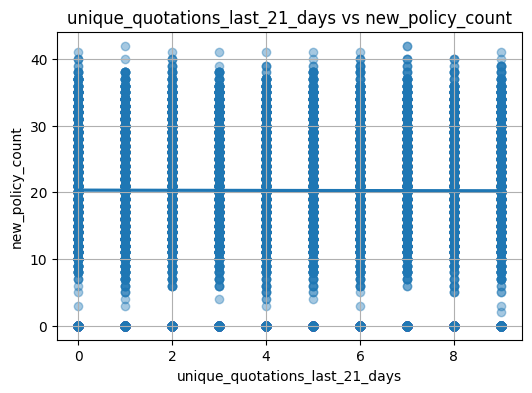

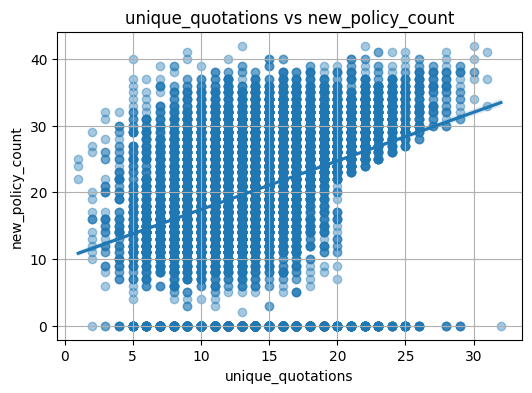

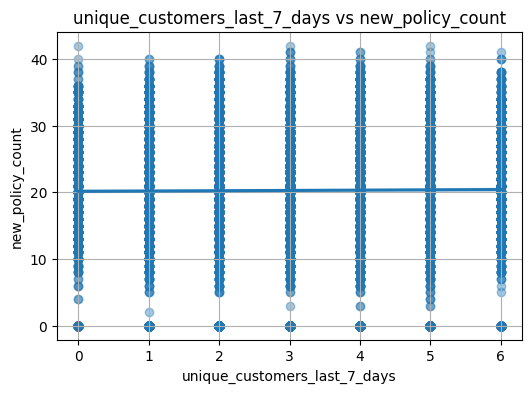

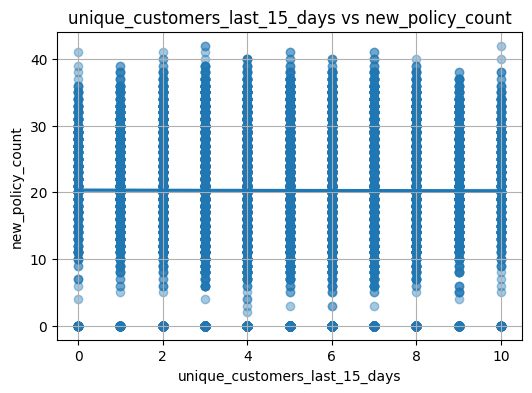

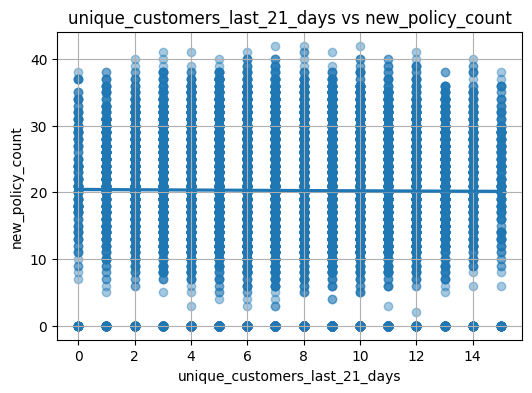

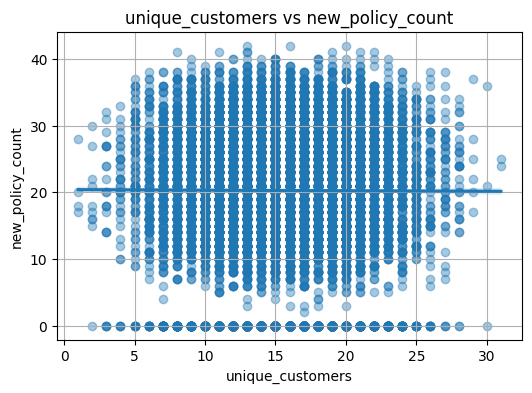

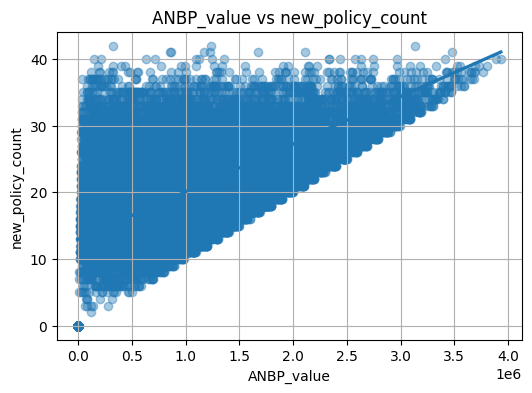

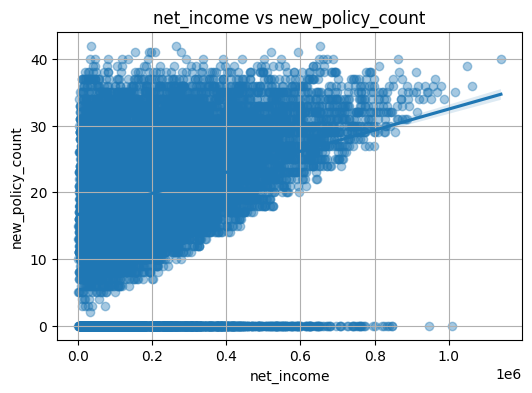

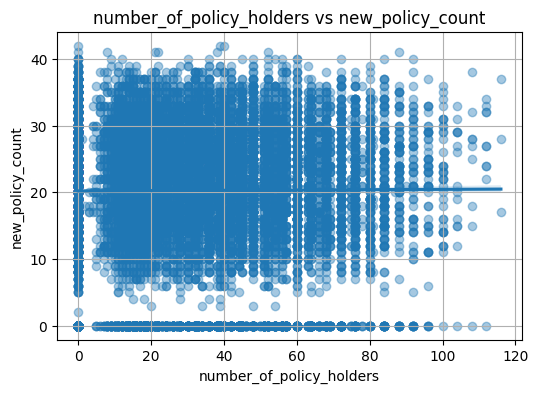

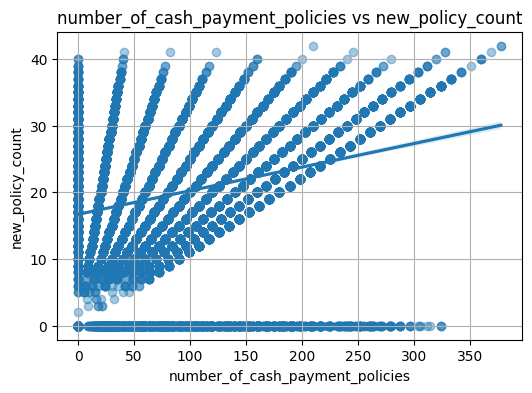

In [12]:
numeric_features = df.select_dtypes(include='number').columns.tolist()


target = 'new_policy_count'  
numeric_features = [col for col in numeric_features if (col != "target" and col != "new_policy_count")]

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=feature, y=target, scatter_kws={'alpha':0.4})
    plt.title(f'{feature} vs {target}')
    plt.grid(True)
    plt.show()


In [13]:
import pandas as pd
from scipy.stats import pearsonr


numeric_columns = df.select_dtypes(include=['number']).columns


correlations = {}


for col in numeric_columns:
    correlation, p_value = pearsonr(df['new_policy_count'], df[col])
    correlations[col] = correlation


correlations

{'agent_age': 0.003663488251658566,
 'unique_proposals_last_7_days': 0.09618422973920115,
 'unique_proposals_last_15_days': 0.19393430999856243,
 'unique_proposals_last_21_days': 0.569787919743747,
 'unique_proposal': 0.6249037418434805,
 'unique_quotations_last_7_days': 0.0018100247245810344,
 'unique_quotations_last_15_days': 0.0022145502556924507,
 'unique_quotations_last_21_days': -0.003038311114634878,
 'unique_quotations': 0.35649537707369894,
 'unique_customers_last_7_days': 0.007515184373395021,
 'unique_customers_last_15_days': -0.002233340896493729,
 'unique_customers_last_21_days': -0.007093615693676733,
 'unique_customers': -0.0038958014736712844,
 'new_policy_count': 1.0,
 'ANBP_value': 0.6028118328745933,
 'net_income': 0.28789928004833804,
 'number_of_policy_holders': 0.006099286913045111,
 'number_of_cash_payment_policies': 0.2790409867575976,
 'target': 0.7079374461027566}

#### Feature Selection Insights from Scatterplots and Pearson Correlation

From the scatterplots (plotted against `new_policy_count`) and the computed Pearson correlation values, we can observe that several features show a notable relationship with the target variable. These features demonstrate trends or linear associations that may contribute significantly to predicting `new_policy_count`.

##### Key Features Identified:
- `unique_proposals_last_21_days`
- `unique_proposal`
- `ANBP_value`
- `unique_quotations`
- `net_income`

These features should be considered strong candidates for inclusion in our predictive modeling pipeline, given their visible patterns and meaningful Pearson correlation scores with the target.


### **Part 2 - How do sales patterns vary by month**

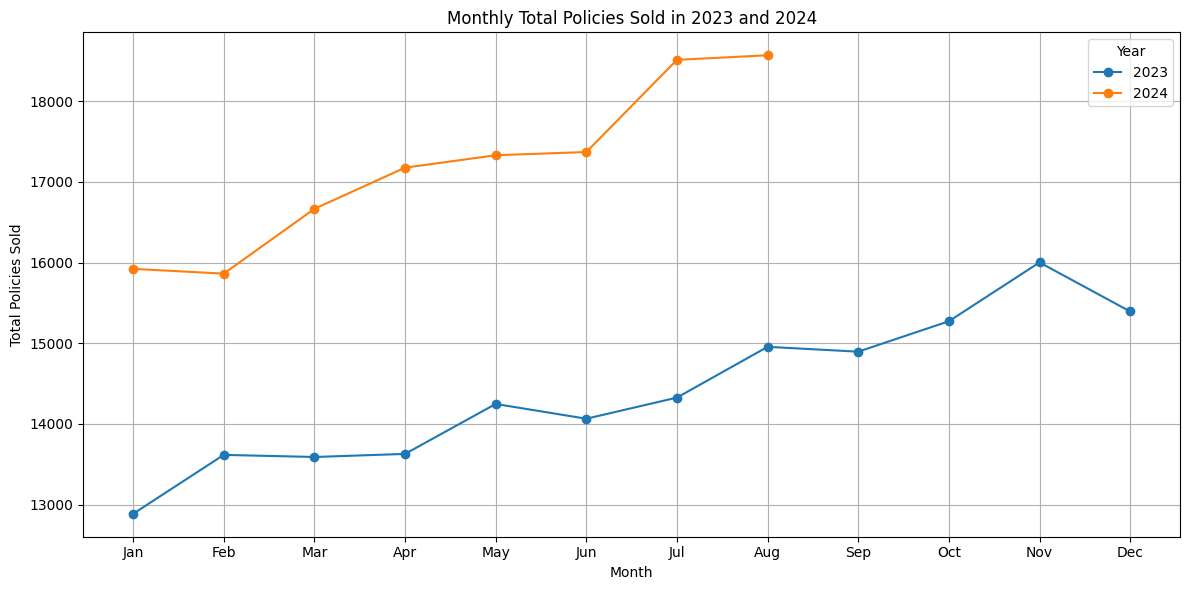

In [14]:
df['year_month'] = pd.to_datetime(df['year_month'], format="%m/%d/%Y")


df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month


df_filtered = df[df['year'].isin([2023, 2024])]


monthly_sales = df_filtered.groupby(['year', 'month'])['new_policy_count'].sum().reset_index()


pivot_table = monthly_sales.pivot(index='month', columns='year', values='new_policy_count')


plt.figure(figsize=(12, 6))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], marker='o', label=f"{year}")

plt.title("Monthly Total Policies Sold in 2023 and 2024")
plt.xlabel("Month")
plt.ylabel("Total Policies Sold")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

####  Monthly Policy Sales Analysis (2023 vs 2024)

The line chart compares the total number of policies sold each month in 2023 and 2024. A clear upward trend is observed in both years, with 2024 consistently outperforming 2023 in every month for which data is available.

####  2023 Sales Trends:
- Sales started at around **12,900** in January and generally increased over the year.
- A **steady climb** can be seen from February through November, peaking at **16,000 policies** in November.
- A slight **drop is noticeable in December**, where sales fell back to around **15,400**—possibly due to seasonal slowdown or holiday effects.

####  2024 Sales Trends:
- Sales began strong at **15,900** in January and rose steadily each month.
- There’s a **significant spike between June and July**, jumping from ~17,400 to **18,500**.
- This peak continued into August, with sales reaching the year’s high of **18,600**.
- The growth appears **more consistent and aggressive** than in 2023, with no noticeable declines in the available data range.

---

####  Key Observations:
- **No unexpected drops** in 2024; the growth trajectory is stable and upward.
- **December 2023** is the only month showing a **minor decline**, potentially due to end-of-year factors.
- The **mid-year acceleration** in 2024 (June–August) suggests a possible campaign, market push, or seasonal demand surge.


### **Part 3 - How do all numerical features interact simultaneously**

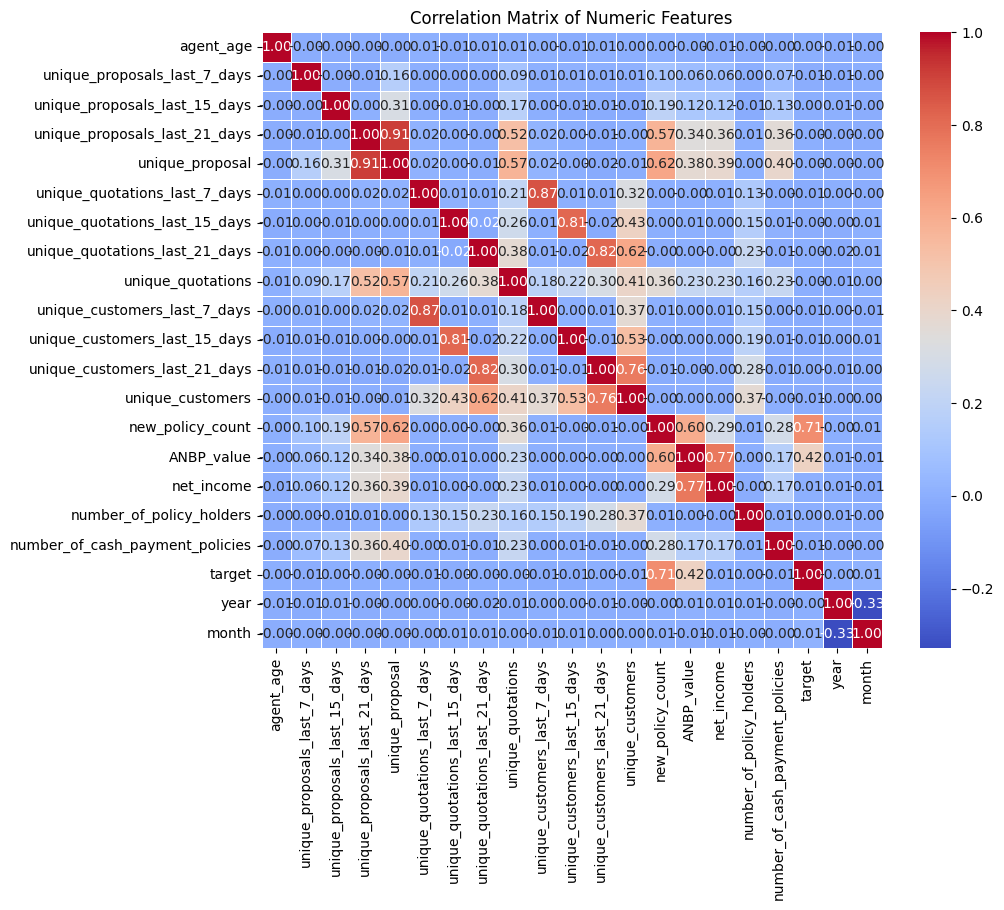

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include='number')  # Select numeric columns


corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


####  Correlation Matrix Insights

Based on the correlation heatmap, here are the key insights derived from the numerical features:

---

####  1. Highly Correlated Feature Clusters

Several groups of features exhibit strong **positive correlations**, indicating they likely represent the same underlying information and could be redundant:

#####  Proposals
- `unique_proposals_last_7/15/21_days` show high correlation with `unique_proposal`  
  **(Correlation ~0.57–0.91)**  
  These are expected to be subsets of the total proposal count, so the strong correlation is natural and highlights redundancy.

#####  Quotations
- `unique_quotations_last_7/15/21_days` are strongly correlated with `unique_quotations`  
  **(Correlation ~0.82–0.88)**  
  Similar to the proposals, these are just segmented views of the same feature across different time windows.

#####  Customers
- `unique_customers_last_7/15/21_days` are also strongly correlated with `unique_customers`  
  **(Correlation ~0.62–0.76)**  
  Again, these time-based features are subsets of the overall customer count.

#####  Business Metrics
- `new_policy_count`, `ANBP_value`, and `net_income` show moderate correlations with:
  - `unique_customers`
  - `unique_proposals`
  **(Correlation ~0.28–0.71)**  
  These metrics likely follow the same business trend—more customers or proposals tend to drive policy count and revenue.


---

####  2. Weak or No Correlation with Target

- The `target` variable shows **very weak correlation** with all other numerical features.  
  ➤ This indicates that **linear relationships** do not explain the target well, and more complex (nonlinear) models may be needed to capture useful patterns.

---

####  3. Agent Age

- `agent_age` appears **uncorrelated** with all other features, including `target`.  
  - This suggests it may not contribute much predictive value on its own, though it might still be useful in combination with other features.

---

####  4. Temporal Features

- `month` has a **mild correlation (~0.33)** with `target`, suggesting some **seasonal trends** could be present.
- `year` shows **negligible correlation**, likely due to limited variation (e.g., data collected within a single year).

---

###  Summary

- Time-windowed features are heavily correlated with their cumulative counterparts—consider aggregating or dropping some.
- Nonlinear models are likely better suited for predicting the target.
- Look into feature interactions or temporal patterns (e.g., seasonal effects) for additional insight.


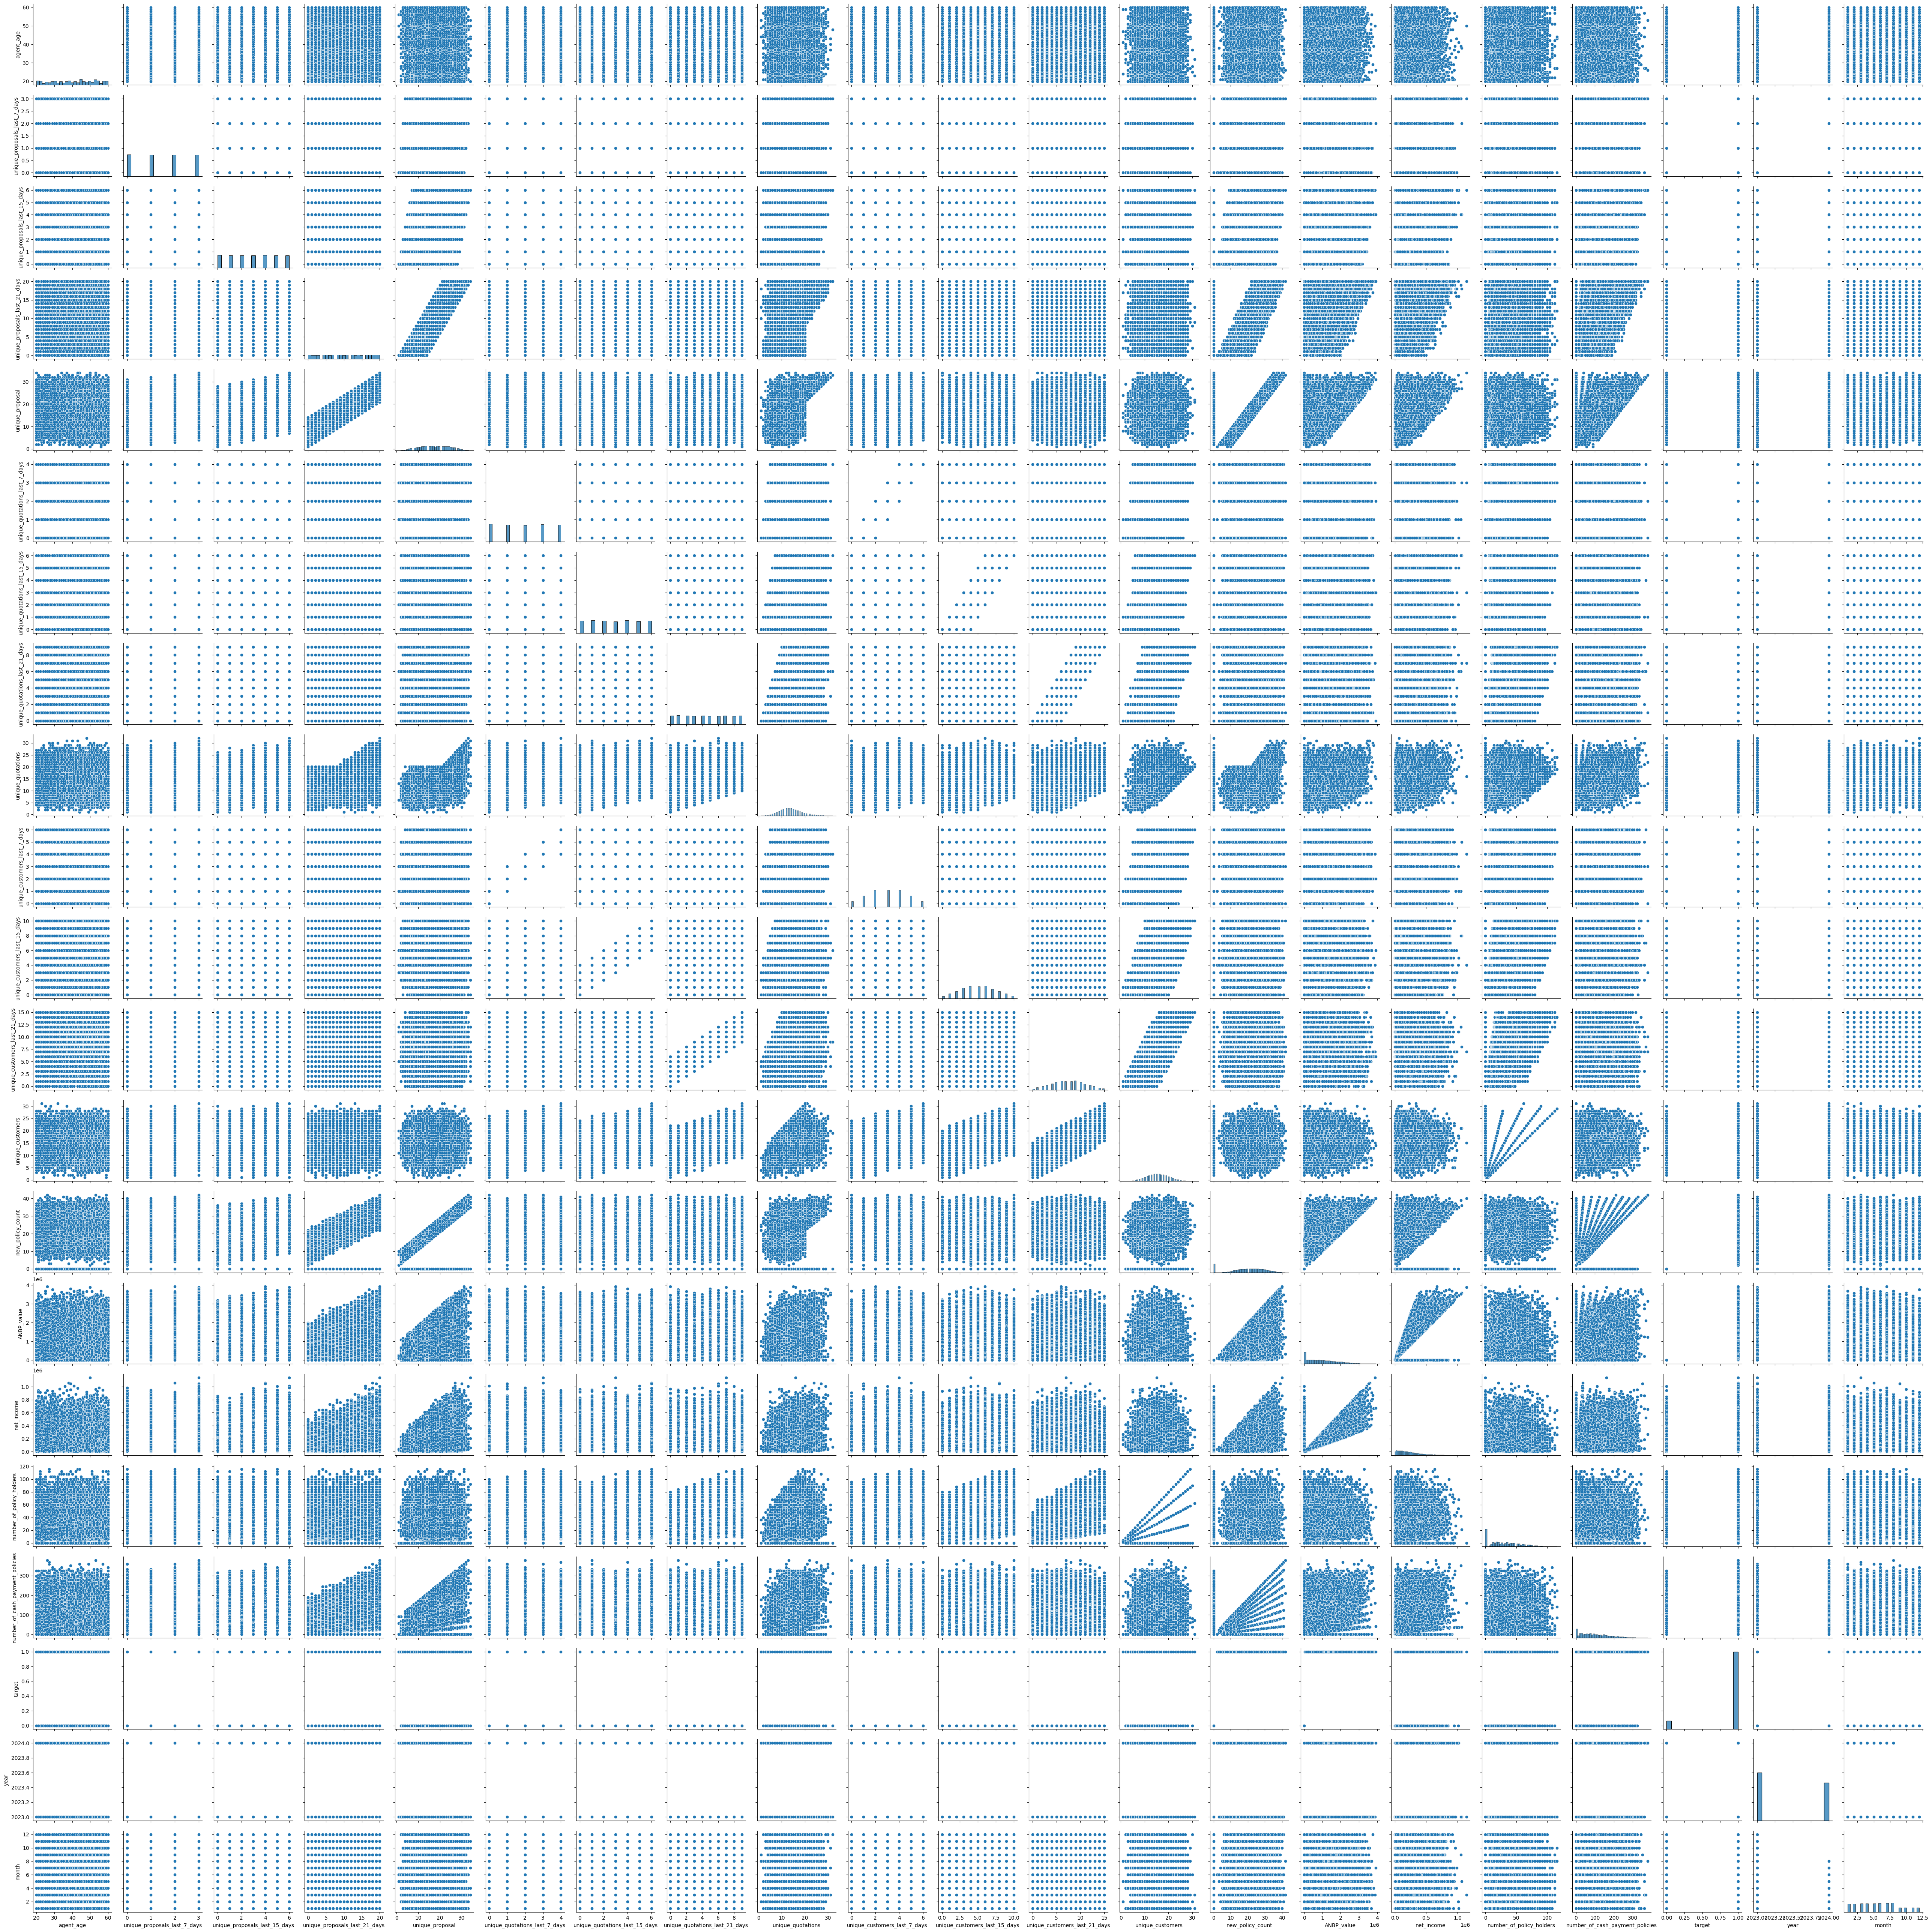

In [16]:
import seaborn as sns

# Plot pairplot
sns.pairplot(numeric_df)


####  Pairplot vs Correlation Matrix — Comparative Insights

The pairplot provides a visual representation of how numerical features interact, complementing the correlation matrix's numerical summary. Here's what we observed:

---

###  1. Strong Linear Relationships (Confirmed)

From the correlation matrix, we identified:
- High correlations among:
  - `unique_proposals_*` features
  - `unique_quotations_*` features
  - `unique_customers_*` features

 **Pairplot confirms** these relationships — clear **diagonal lines** or **dense linear clusters** are visible between these variables.  
These patterns visually validate the redundancy suggested in the heatmap.

>  Redundant time-windowed features — consider dropping or aggregating.

---

###  2. Nonlinear or No Clear Relationships

The correlation matrix showed that:
- `target` had **low correlation** with almost all other features.

 The pairplot reinforces this — **no strong pattern** or shape is visible between `target` and other variables.  
→ This suggests that linear models will likely **struggle**, and **nonlinear models** (e.g., tree-based) are worth exploring.

---

###  3. Agent Age

From the correlation matrix:
- `agent_age` had **no strong correlations** with anything.

 In the pairplot, this is reflected in **scatterplots with no trend** or structure involving `agent_age`, reinforcing its limited standalone predictive value.

---

###  4. Temporal Features (`month`, `year`)

The heatmap showed:
- `month` had **weak-to-moderate** correlation with `target` (~0.33)
- `year` had **negligible** correlation

 **Pairplot view:**
- `month` shows **some mild patterns** with variables like `target` and `net_income`, possibly indicating **seasonality**
- `year` appears mostly **constant or categorical**, explaining its weak interaction.

---

###  Bonus Insights from Pairplot

- The **density** and **striped patterns** in some plots (e.g., `net_income`, `new_policy_count`) may suggest **discrete or capped values**.
- Some variables exhibit **nonlinear but structured relationships** (e.g., curves or clusters), which are **not captured by correlation coefficients** — a major advantage of pairplots.

---




### **Part 4 - How agents performance evolves with time**

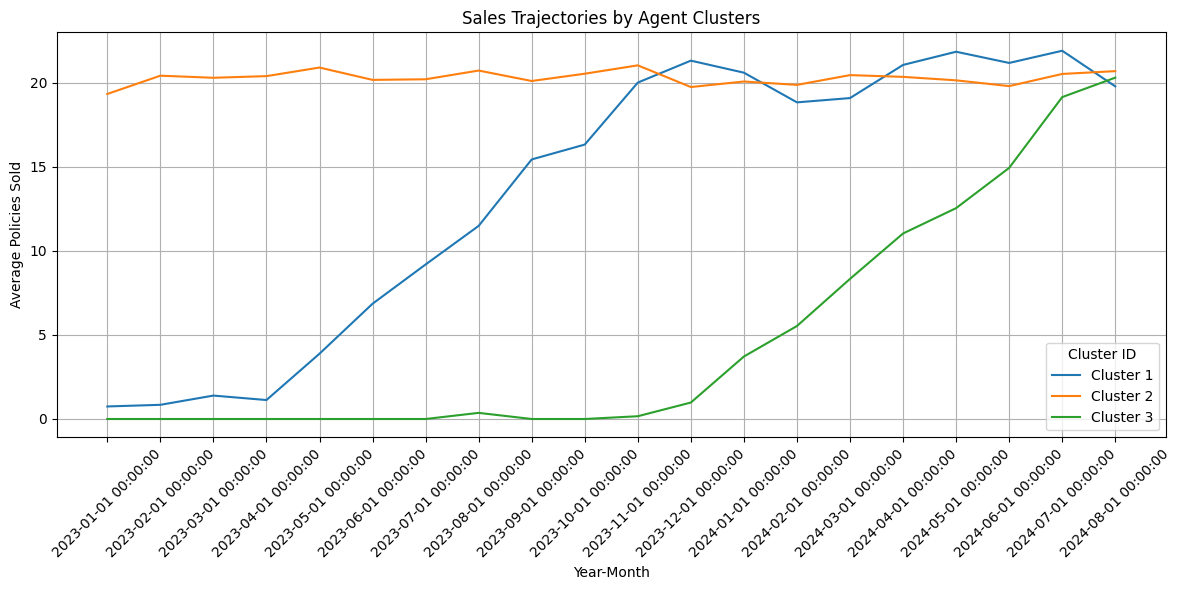

year_month  cluster
agent_code         
9bf2290b          0
cbb419aa          0
974da954          0
9716c60e          0
62d089a7          0
...             ...
64e42473          2
c21ae5a1          2
6643513a          2
deb74689          2
bda544ec          2

[905 rows x 1 columns]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv('train_storming_round.csv')


df['year_month'] = pd.to_datetime(df['year_month'], format="%m/%d/%Y")
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month


pivoted_data = df.pivot_table(index='agent_code', columns='year_month', values='new_policy_count', aggfunc='sum').fillna(0)


n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pivoted_data['cluster'] = kmeans.fit_predict(pivoted_data)


plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_data = pivoted_data[pivoted_data['cluster'] == cluster].drop(columns=['cluster'])
    plt.plot(cluster_data.columns.astype(str), cluster_data.mean(axis=0), label=f'Cluster {cluster + 1}')

plt.title('Sales Trajectories by Agent Clusters')
plt.xlabel('Year-Month')
plt.ylabel('Average Policies Sold')
plt.legend(title="Cluster ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


print(pivoted_data[['cluster']].sort_values('cluster'))


#### Performance Analysis of Clusters

- **Cluster 1 (High Performers):**  
  Agents in Cluster 1 consistently performed well throughout the study period. They maintained a high level of performance with a stable average of policies sold, showing steady results over time.

- **Cluster 2 and Cluster 3 (Beginners):**  
  Both Cluster 2 and Cluster 3 consist of beginner agents with a significantly lower average of policies sold compared to Cluster 1. However, with time, both clusters managed to improve and eventually reached the performance level of Cluster 1.

- **Cluster 3 - Slower Progress:**  
  While Cluster 2 agents were able to catch up with the performance of Cluster 1 relatively quickly, Cluster 3 agents took considerably longer to reach the same level of success.


### **Part 5 - More EDA**

#### Behavioral Consistency Score

##### What is it?
The **Behavioral Consistency Score** is a custom metric designed to measure how **stable and predictable** an agent’s performance is over time.

##### Why it matters?
Agents who perform consistently across months — in terms of proposals, quotations, customers, and income — may be more reliable, easier to manage, and better suited for long-term planning compared to agents with high volatility.

---

##### How is it calculated?

1. **Select Key Metrics**  
   We use performance indicators such as:
   - `new_policy_count`
   - `unique_proposal`
   - `unique_quotations`
   - `unique_customers`
   - `ANBP_value`
   - `net_income`

2. **Group by Agent and Month**  
   Aggregate the monthly performance of each agent.

3. **Rolling Coefficient of Variation (CV)**  
   For each agent, compute the **CV** of each metric over a rolling 3-month window:  
   \[
   \text{CV} = \frac{\text{Standard Deviation}}{\text{Mean}}
   \]  
   A lower CV means the agent's performance is more stable.

4. **Aggregate CVs to Compute Consistency**  
   Average the CVs across all metrics and take the **inverse** to get a consistency score:  
   \[
   \text{Consistency Score} = \frac{1}{\text{Average CV + 𝜖}}
   \]  
   where 𝜖 is a small value to avoid division by zero.

---

##### Interpretation:
- **Higher score** → more behaviorally consistent (stable)
- **Lower score** → more volatile or irregular performance


C:\Users\chand\AppData\Local\Temp\ipykernel_22988\2975357579.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_cv = agent_monthly.groupby('agent_code', group_keys=False).apply(calc_rolling_cv)


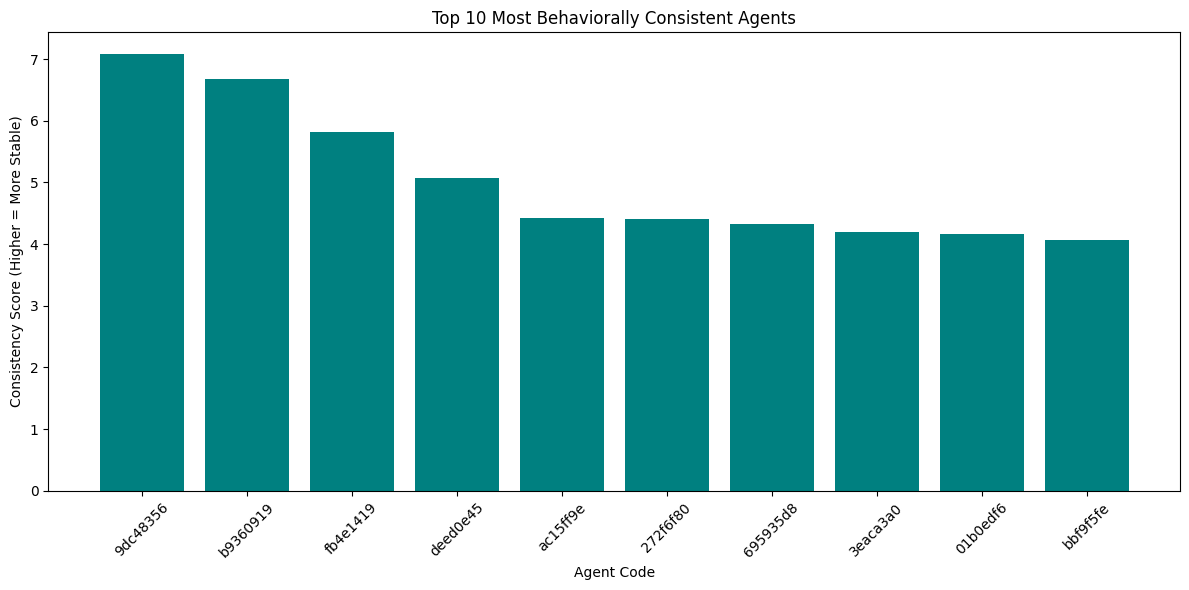

In [18]:

key_metrics = ['new_policy_count', 'unique_proposal', 'unique_quotations', 
               'unique_customers', 'ANBP_value', 'net_income']


df['year_month'] = pd.to_datetime(df['year_month'])


agent_monthly = df.groupby(['agent_code', 'year_month'])[key_metrics].sum().reset_index()


agent_monthly = agent_monthly.sort_values(by=['agent_code', 'year_month'])


window_size = 3
def calc_rolling_cv(group):
    rolling_mean = group[key_metrics].rolling(window=window_size, min_periods=2).mean()
    rolling_std = group[key_metrics].rolling(window=window_size, min_periods=2).std()
    cv = rolling_std / (rolling_mean + 1e-6)  # Avoid division by zero
    return cv

rolling_cv = agent_monthly.groupby('agent_code', group_keys=False).apply(calc_rolling_cv)


agent_monthly_cv = agent_monthly.copy()
agent_monthly_cv[key_metrics] = rolling_cv


agent_consistency = agent_monthly_cv.groupby('agent_code')[key_metrics].mean()
agent_consistency_score = 1 / (agent_consistency.mean(axis=1) + 1e-6)  # Inverse to make high = more consistent
agent_consistency_score = agent_consistency_score.reset_index().rename(columns={0: 'consistency_score'})


plt.figure(figsize=(12, 6))
top_agents = agent_consistency_score.sort_values('consistency_score', ascending=False).head(10)
plt.bar(top_agents['agent_code'], top_agents['consistency_score'], color='teal')
plt.title('Top 10 Most Behaviorally Consistent Agents')
plt.xlabel('Agent Code')
plt.ylabel('Consistency Score (Higher = More Stable)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




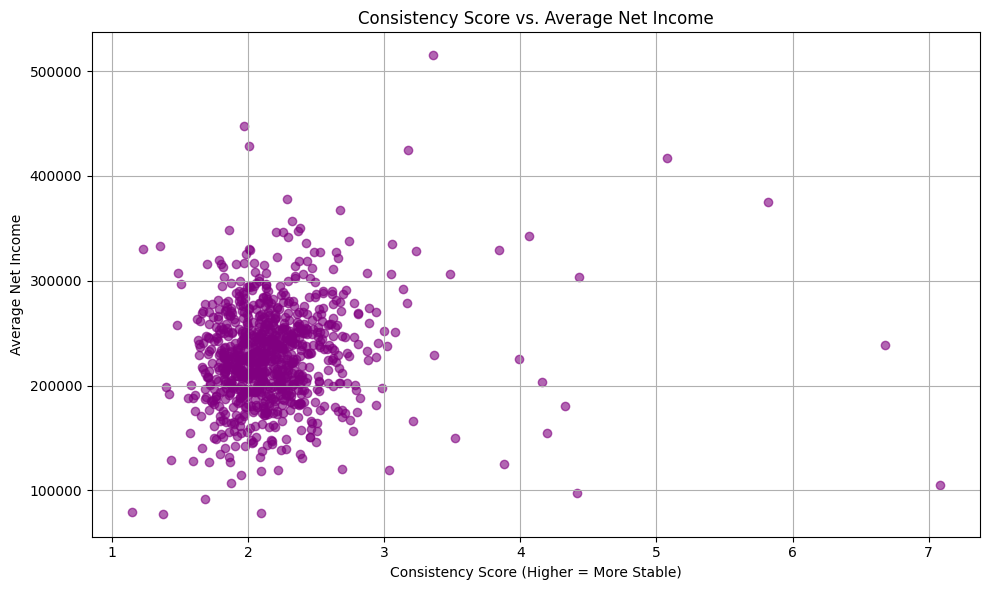

In [19]:

avg_income = agent_monthly.groupby('agent_code')['net_income'].mean().reset_index().rename(columns={'net_income': 'avg_net_income'})
consistency_vs_income = pd.merge(agent_consistency_score, avg_income, on='agent_code')


plt.figure(figsize=(10, 6))
plt.scatter(consistency_vs_income['consistency_score'], consistency_vs_income['avg_net_income'], alpha=0.6, color='purple')
plt.title('Consistency Score vs. Average Net Income')
plt.xlabel('Consistency Score (Higher = More Stable)')
plt.ylabel('Average Net Income')
plt.grid(True)
plt.tight_layout()
plt.show()


####  Insights: Consistency Score vs. Average Net Income

#####  Observations:

1. **Tight Cluster Around Consistency Score ~2**  
   - Most agents have consistency scores between **1.5 and 2.5**.  
   - Their average net incomes cluster between **₹150K–₹300K**, centering around ₹200K–₹250K.  
   - This suggests a strong average performance zone for **moderately consistent agents**.

2. **Higher Consistency ≠ Guaranteed Higher Income**  
   - Few agents have consistency scores above **4**, and their income levels are spread out.  
   - Some highly consistent agents earn well (₹400K–₹500K), but many others don’t.  
   - Extreme consistency does **not strongly correlate** with high net income.

3. **Presence of Outliers**  
   - Some agents with **low consistency** still have very high net income → likely volatile high performers.  
   - A few agents with **high consistency** but low income → possibly underleveraged or in low-opportunity segments.

---

#####  Key Insight:

> **Moderate consistency is most common and aligns best with income stability.**  
> There is no clear linear correlation between consistency and income, suggesting **multiple paths to success** (e.g., steady performance vs. high-risk bursts).



In [20]:

df['agent_join_month'] = pd.to_datetime(df['agent_join_month'])
df['first_policy_sold_month'] = pd.to_datetime(df['first_policy_sold_month'])
df['year_month'] = pd.to_datetime(df['year_month'])

import numpy as np


agent_ramp = df[['agent_code', 'agent_join_month', 'first_policy_sold_month']].drop_duplicates()


agent_ramp['ramp_up_days'] = (agent_ramp['first_policy_sold_month'] - agent_ramp['agent_join_month']).dt.days


agent_ramp['ramp_up_months'] = (agent_ramp['ramp_up_days'] / 30).round(1)



peak_anbp = df.loc[df.groupby('agent_code')['ANBP_value'].idxmax()][['agent_code', 'year_month']]
peak_anbp = peak_anbp.rename(columns={'year_month': 'peak_anbp_month'})

peak_income = df.loc[df.groupby('agent_code')['net_income'].idxmax()][['agent_code', 'year_month']]
peak_income = peak_income.rename(columns={'year_month': 'peak_income_month'})


agent_lag_analysis = agent_ramp.merge(peak_anbp, on='agent_code', how='left')
agent_lag_analysis = agent_lag_analysis.merge(peak_income, on='agent_code', how='left')




agent_lag_analysis['days_to_peak_anbp'] = (agent_lag_analysis['peak_anbp_month'] - agent_lag_analysis['first_policy_sold_month']).dt.days
agent_lag_analysis['months_to_peak_anbp'] = (agent_lag_analysis['days_to_peak_anbp'] / 30.44).round(1)


agent_lag_analysis['days_to_peak_income'] = (agent_lag_analysis['peak_income_month'] - agent_lag_analysis['first_policy_sold_month']).dt.days
agent_lag_analysis['months_to_peak_income'] = (agent_lag_analysis['days_to_peak_income'] / 30.44).round(1)



agent_lag_analysis = agent_lag_analysis[['agent_code', 'ramp_up_months', 'months_to_peak_anbp', 'months_to_peak_income']]
print(agent_lag_analysis.head())


  agent_code  ramp_up_months  months_to_peak_anbp  months_to_peak_income
0   455ca878            31.4                  5.0                    5.0
1   c823ce77            22.4                  3.0                    3.0
2   62154055            40.6                  6.0                    9.0
3   c58bfa6e            32.5                 12.0                   12.0
4   b1e5f770            29.4                 -1.0                   -1.0


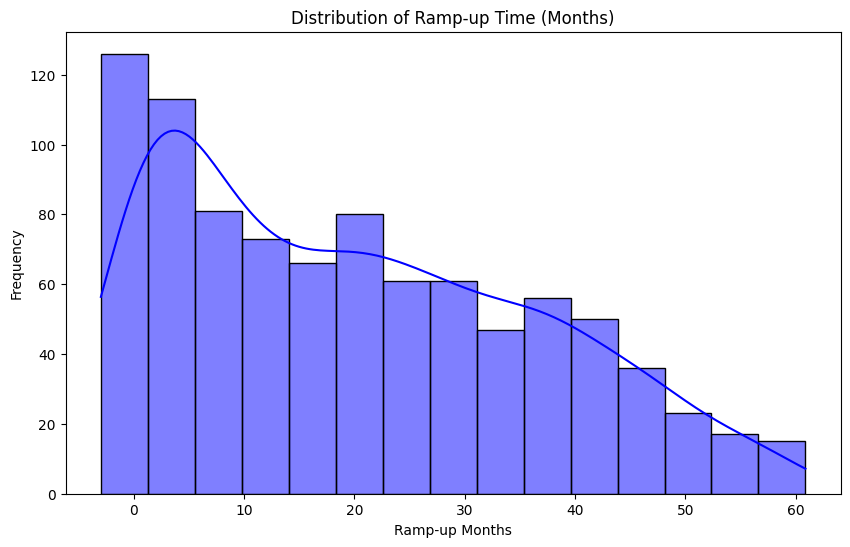

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(agent_lag_analysis['ramp_up_months'], kde=True, color='blue', bins=15)
plt.title('Distribution of Ramp-up Time (Months)')
plt.xlabel('Ramp-up Months')
plt.ylabel('Frequency')
plt.show()


##### Insights from Ramp-up Time Distribution

- **Most agents sell early**: A significant number of agents sell their first policy within the first few months, especially within 0–5 months.
- **Gradual decline**: The number of agents ramping up decreases steadily as time increases.
- **Long tail**: A smaller portion of agents take over a year (12+ months) to sell their first policy, with some taking up to 60 months.
- **Implication**: Early success is common, but extended ramp-up times suggest potential inefficiencies or the need for improved onboarding/training.


C:\Users\chand\AppData\Local\Temp\ipykernel_22988\2246382043.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = agent_lag_analysis.groupby('ramp_up_category').agg({


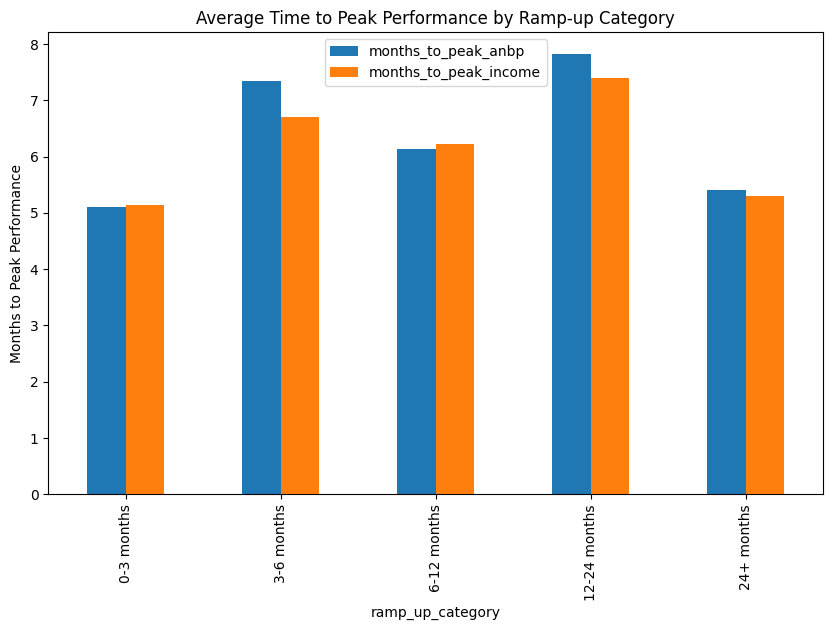

In [22]:
# Create a new column to categorize ramp-up months into different groups
bins = [0, 3, 6, 12, 24, np.inf]
labels = ['0-3 months', '3-6 months', '6-12 months', '12-24 months', '24+ months']
agent_lag_analysis['ramp_up_category'] = pd.cut(agent_lag_analysis['ramp_up_months'], bins=bins, labels=labels)

# Group by ramp-up category and calculate mean for time to peak
group_analysis = agent_lag_analysis.groupby('ramp_up_category').agg({
    'months_to_peak_anbp': 'mean',
    'months_to_peak_income': 'mean'
}).reset_index()

# Plot the grouped data
group_analysis.plot(x='ramp_up_category', y=['months_to_peak_anbp', 'months_to_peak_income'], kind='bar', figsize=(10, 6))
plt.title('Average Time to Peak Performance by Ramp-up Category')
plt.ylabel('Months to Peak Performance')
plt.show()


##### Insights from Peak Performance by Ramp-up Category

- **Fast ramp-up, fast peak**: Agents who ramp up within 0–3 months reach peak performance the quickest (~5.1 months).
- **Delayed ramp-up, slower peak**: Agents in the 12–24 month ramp-up group take the longest to peak (~7.8 months).
- **Moderate groups vary**: Those in the 3–6 and 6–12 month categories show varied peak times, with 3–6 months taking longer.
- **Interesting outlier**: Agents who took over 24 months to ramp up reach peak slightly faster than the 3–12 month groups.
- **Consistent patterns**: Time to peak for both `anbp` and `income` follow a similar trend across categories.
